<a href="https://colab.research.google.com/github/Edunet-Foundation/CTS/blob/main/Internet%20of%20Things/DA/ADSB_Planes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
#Reading the csv file into the pandas dataframe
data = pd.read_csv('data.csv')
data

,Unnamed: 0,hexcode,mode,squawk,flight,altitude,speed,heading,latitude,longitude,signal,messages,ti,timestamp
0,0,800b05,S,,,5850,,,,,23,1,0,2014-10-19 07:12:15
1,1,800b05,S,,,5850,211,217,,,23,2,0,2014-10-19 07:12:15.001000
2,2,800b05,S,,,5850,211,217,,,23,2,1,2014-10-19 07:12:16
3,3,8006fc,S,,,38350,,,,,6,1,0,2014-10-19 07:12:16.001000
4,4,800b05,S,,,5850,211,217,,,23,2,1,2014-10-19 07:12:16.002000
5,5,8006fc,S,,,38350,,,,,6,1,0,2014-10-19 07:12:16.003000
6,6,800b05,S,,,5850,211,217,,,23,3,0,2014-10-19 07:12:16.004000
7,7,8006fc,S,,,38375,,,,,6,3,0,2014-10-19 07:12:16.005000
8,8,800b05,S,,,5850,211,217,,,22,4,0,2014-10-19 07:12:16.006000
9,9,8006fc,S,,,38375,,,,,6,3,1,2014-10-19 07:12:17


In [ ]:
# Remove the column that is not required
del data['Unnamed: 0']
data

,hexcode,mode,squawk,flight,altitude,speed,heading,latitude,longitude,signal,messages,ti,timestamp
0,800b05,S,,,5850,,,,,23,1,0,2014-10-19 07:12:15
1,800b05,S,,,5850,211,217,,,23,2,0,2014-10-19 07:12:15.001000
2,800b05,S,,,5850,211,217,,,23,2,1,2014-10-19 07:12:16
3,8006fc,S,,,38350,,,,,6,1,0,2014-10-19 07:12:16.001000
4,800b05,S,,,5850,211,217,,,23,2,1,2014-10-19 07:12:16.002000
5,8006fc,S,,,38350,,,,,6,1,0,2014-10-19 07:12:16.003000
6,800b05,S,,,5850,211,217,,,23,3,0,2014-10-19 07:12:16.004000
7,8006fc,S,,,38375,,,,,6,3,0,2014-10-19 07:12:16.005000
8,800b05,S,,,5850,211,217,,,22,4,0,2014-10-19 07:12:16.006000
9,8006fc,S,,,38375,,,,,6,3,1,2014-10-19 07:12:17


In [ ]:
data.describe()

,signal,messages,ti
count,604215.000000,604215.000000,604215.000000
mean,13.204141,985.592594,9.962154
std,15.195620,1297.133100,15.145329
min,4.000000,1.000000,0.000000
25%,7.000000,97.000000,0.000000
50%,9.000000,448.000000,2.000000
75%,13.000000,1340.000000,14.000000
max,182.000000,6469.000000,60.000000


In [ ]:
# Gives the unique aircrafts in the data
unique_hexcode = data.hexcode.unique()

In [ ]:
type(unique_hexcode)

numpy.ndarray

In [ ]:
unique_hexcode

array(['800b05', '8006fc', '8004fd', '8004fb', '8004b8', '800b14',
       '800549', '80015a', '8001d9', '800afb', '800af0', '8005dd',
       '4007f1', '80070f', '80047b', '8007f7', '800603', '80068b',
       '800647', '8004cd', '800b1a', '80052e', '8005b8', '8006fe',
       '800595', '80053d', '8007f2', '80003d', '89609b', '800af9',
       '800657', '8007b7', '06a024', '800408', '800717', '80058a',
       '80068a', '3c7063', '800712', '70c0a8', '800655', '896309',
       '800af6', '8961a3', '800656', '80041f', '800b09', '8007c2',
       '800670', '773000', '800400', '06a01f', '80015d', '80064f',
       '800b18', '8006e8', '80046c', '8007b3', '89604c', '800af4',
       '8007c9', '800b2b', '80051b', '8004d9', '8005fd', '8004b5',
       '06a191', '800b0b', '8003c1', '800466', '800738', '800030',
       '8960d9', '800488', '800b0a', '89407a', '800489', '80067f',
       '8001dc', '800b11', '75008d', '8963b1', '8007c0', '8007c4',
       '800617', '80068f', '8007b8', '800627', '80074d', '8006

In [ ]:
unique_hexcode.size

130

In [ ]:
# Finding the number and percentage of domestic Planes and International Planes ( Indian planes start with the code '800')

In [ ]:
hexcode_first_three = pd.Series(unique_hexcode.astype('str')).str[:3]

In [ ]:
hexcode_first_three

0      800
1      800
2      800
3      800
4      800
5      800
6      800
7      800
8      800
9      800
10     800
11     800
12     400
13     800
14     800
15     800
16     800
17     800
18     800
19     800
20     800
21     800
22     800
23     800
24     800
25     800
26     800
27     800
28     896
29     800
      ... 
100    800
101    800
102    800
103    800
104    800
105    750
106    800
107    800
108    06a
109    800
110    896
111    800
112    800
113    800
114    896
115    896
116    800
117    800
118    300
119    800
120    800
121    800
122    800
123    800
124    800
125    800
126    800
127    06a
128    70c
129    800
dtype: object

In [ ]:
Type_Aircraft_Boolean = hexcode_first_three == '800'
Type_Aircraft_Boolean

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12     False
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28     False
29      True
       ...  
100     True
101     True
102     True
103     True
104     True
105    False
106     True
107     True
108    False
109     True
110    False
111     True
112     True
113     True
114    False
115    False
116     True
117     True
118    False
119     True
120     True
121     True
122     True
123     True
124     True
125     True
126     True
127    False
128    False
129     True
dtype: bool

In [ ]:
Domestic = sum(Type_Aircraft_Boolean)
Domestic

105

In [ ]:
International = Type_Aircraft_Boolean.size - Domestic
International

25

In [ ]:
Percentage_Domestic = round(Domestic*100.0/(Domestic+International),1)
print 'The Percentage of Domestic aircrafts is ' + str(Percentage_Domestic)+' %'
print 'The Percentage of International aircrafts is ' + str(100-Percentage_Domestic)+' %'

The Percentage of Domestic aircrafts is 80.8 %
The Percentage of International aircrafts is 19.2 %


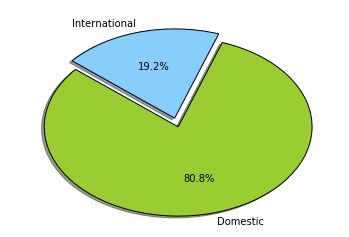

In [ ]:
#Plotting chart of percentage of Domestic and International
labels = 'Domestic', 'International'
sizes = [Domestic,International]
colors = ['yellowgreen','lightskyblue']
explode = (0.1,0)
plt.figure(1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [ ]:
unique_flight = data.flight.str.strip().unique() # removes the unwanted white spaces

In [ ]:
unique_flight

array(['', 'BDA403', 'AIC640', 'SEJ442', 'GOW283', 'SEJ871', 'IGO516',
       'BAW118', 'IGO111', 'JAI256', 'GOW321', 'IGO421', 'SEJ502',
       'AIC515', 'JAI405', 'AIC667', 'JAI2735', 'IGO427', 'IGO545',
       'IGO126', 'SEJ281', 'JAI489', 'SEJ291', 'JAI411', 'AIC603',
       'UAE544', 'AIC263', 'SEJ1073', 'GEC8378', 'IGO411', 'IGO424',
       'OMA252', 'LEP666', 'SEJ1031', 'SEJ3301', 'AIC466', 'ETD474',
       'JAI2363', 'SEJ227', 'IAD1212', 'SEJ3022', 'AIC570', 'IGO457',
       'QTR956', 'SEJ3145', 'GOW395', 'JAI824', 'SEJ1046', 'IGO409',
       'UAE564', 'IGO377', 'SEJ501', 'IGO455', 'IGO315', 'IGO065',
       'JAI2612', 'IGO356', 'IGO376', 'AIC517', 'QTR8882', 'IGO109',
       'GOW116', 'AIC976', 'GOW348', 'AIC803', 'UAE346', 'AIC604',
       'SEJ152', 'IAD1323', 'VTANF', 'IGO298', 'GFA060', 'MAS8217',
       'FDB551', 'IAD1123', 'JAI412', 'IGO428', 'IGO151', 'SEJ521',
       'JAI807', 'JAI465', 'JAI2400', 'IGO502', 'LEP667', 'SEJ236',
       'SEJ917', 'SEJ344', 'SEJ1032', 'LEP6

In [ ]:
unique_flight.size

154

In [ ]:
# Market share of each airline. Indigo, SpiceJet and so on...

# Info on data from Wikipedia
# IATA airline designators, sometimes called IATA reservation codes, are two-character codes assigned by the International Air Transport Association (IATA) to the world's airlines

#After an airline is delisted, IATA can make the code available for reuse after six months and can issue "controlled duplicates". Controlled duplicates are issued to regional airlines whose destinations are not likely to overlap, so that the same code is shared by two airlines. The controlled duplicate is denoted here, and in IATA literature, with an asterisk (*). An example of this is the code "6Y", which refers to both Mid Airlines, a charter airline in Sudan, and Med Airways, a charter airline in Lebanon.


# The ICAO airline designator is a code assigned by the International Civil Aviation Organization (ICAO) to aircraft operating agencies, aeronautical authorities, and services related to international aviation, each of whom is allocated both a three-letter designator and a telephony designator. These codes are unique by airline, unlike the IATA airline designator codes 
#An example is:
#Operator: American Airlines
#Three-letter designator: AAL (the original ICAO-two-letter-designator AA was used until 1987 and is also the IATA code of the airline)
#Telephony designator: AMERICAN

In [ ]:
#Query the first three letters which is the ICAO
# IATA	ICAO	Callsign
# AI	 AIC	AIRINDIA

In [ ]:
unique_flight_first_three = pd.Series(unique_flight.astype('str')).str[:3]
unique_flight_first_three

0         
1      BDA
2      AIC
3      SEJ
4      GOW
5      SEJ
6      IGO
7      BAW
8      IGO
9      JAI
10     GOW
11     IGO
12     SEJ
13     AIC
14     JAI
15     AIC
16     JAI
17     IGO
18     IGO
19     IGO
20     SEJ
21     JAI
22     SEJ
23     JAI
24     AIC
25     UAE
26     AIC
27     SEJ
28     GEC
29     IGO
      ... 
124    UAE
125    SEJ
126    QTR
127    IGO
128    IGO
129    SEJ
130    UAE
131    UAE
132    IGO
133    EXV
134    GOW
135    IGO
136    IGO
137    JAI
138    JAI
139    JLL
140    AIC
141    IGO
142    SEJ
143    JLL
144    QTR
145    AIC
146    JLL
147    IGO
148    SEJ
149    OMA
150    LEP
151    AIC
152    AIC
153    SEJ
dtype: object

In [ ]:
unique_flight_first_three = unique_flight_first_three.replace('',np.nan)
unique_flight_first_three

0      NaN
1      BDA
2      AIC
3      SEJ
4      GOW
5      SEJ
6      IGO
7      BAW
8      IGO
9      JAI
10     GOW
11     IGO
12     SEJ
13     AIC
14     JAI
15     AIC
16     JAI
17     IGO
18     IGO
19     IGO
20     SEJ
21     JAI
22     SEJ
23     JAI
24     AIC
25     UAE
26     AIC
27     SEJ
28     GEC
29     IGO
      ... 
124    UAE
125    SEJ
126    QTR
127    IGO
128    IGO
129    SEJ
130    UAE
131    UAE
132    IGO
133    EXV
134    GOW
135    IGO
136    IGO
137    JAI
138    JAI
139    JLL
140    AIC
141    IGO
142    SEJ
143    JLL
144    QTR
145    AIC
146    JLL
147    IGO
148    SEJ
149    OMA
150    LEP
151    AIC
152    AIC
153    SEJ
dtype: object

In [ ]:
Flight_counts = unique_flight_first_three.value_counts(dropna=False)
Flight_counts = Flight_counts.reset_index(drop=False)
Flight_counts.rename(columns={'index': 'ICAO', 0:'Count'}, inplace=True)
Flight_counts

,ICAO,Count
0,IGO,37
1,SEJ,32
2,AIC,18
3,JAI,18
4,UAE,8
5,LEP,6
6,GOW,6
7,IAD,5
8,JLL,4
9,QTR,4


In [ ]:
Flight_counts['ICAO'][0]

'IGO'

In [ ]:
#Count the number of carriers in the day

In [ ]:
airline = pd.read_csv('./Airlines/Airlines_callsign_IATA_ICAO.csv')
airline

,Unnamed: 0,Callsign,Tag,Number,IATA,ICAO
0,0,Dornier Aviation Nigeria Aiep,DO / DAV,3,DO,DAV
1,1,LATAM Airlines Ecuador,XL / LNE,6,XL,LNE
2,2,9 Air,AQ / JYH,8,AQ,JYH
3,3,ABX Air,GB / ABX,14,GB,ABX
4,4,Adria Airways,JP / ADR,13,JP,ADR
5,5,Aegean Airlines,A3 / AEE,48,A3,AEE
6,6,Aer Lingus,EI / EIN,63,EI,EIN
7,7,Aero Contractors,NG / NIG,8,NG,NIG
8,8,Aero Vip,WV / RVP,7,WV,RVP
9,9,Aero-Dienst,ADN,16,NaN,ADN


In [ ]:
del airline['Unnamed: 0']
airline

,Callsign,Tag,Number,IATA,ICAO
0,Dornier Aviation Nigeria Aiep,DO / DAV,3,DO,DAV
1,LATAM Airlines Ecuador,XL / LNE,6,XL,LNE
2,9 Air,AQ / JYH,8,AQ,JYH
3,ABX Air,GB / ABX,14,GB,ABX
4,Adria Airways,JP / ADR,13,JP,ADR
5,Aegean Airlines,A3 / AEE,48,A3,AEE
6,Aer Lingus,EI / EIN,63,EI,EIN
7,Aero Contractors,NG / NIG,8,NG,NIG
8,Aero Vip,WV / RVP,7,WV,RVP
9,Aero-Dienst,ADN,16,NaN,ADN


In [ ]:
airline 

,Callsign,Tag,Number,IATA,ICAO
0,Dornier Aviation Nigeria Aiep,DO / DAV,3,DO,DAV
1,LATAM Airlines Ecuador,XL / LNE,6,XL,LNE
2,9 Air,AQ / JYH,8,AQ,JYH
3,ABX Air,GB / ABX,14,GB,ABX
4,Adria Airways,JP / ADR,13,JP,ADR
5,Aegean Airlines,A3 / AEE,48,A3,AEE
6,Aer Lingus,EI / EIN,63,EI,EIN
7,Aero Contractors,NG / NIG,8,NG,NIG
8,Aero Vip,WV / RVP,7,WV,RVP
9,Aero-Dienst,ADN,16,NaN,ADN


In [ ]:
airline.ICAO = airline.ICAO.str.strip()
airline

,Callsign,Tag,Number,IATA,ICAO
0,Dornier Aviation Nigeria Aiep,DO / DAV,3,DO,DAV
1,LATAM Airlines Ecuador,XL / LNE,6,XL,LNE
2,9 Air,AQ / JYH,8,AQ,JYH
3,ABX Air,GB / ABX,14,GB,ABX
4,Adria Airways,JP / ADR,13,JP,ADR
5,Aegean Airlines,A3 / AEE,48,A3,AEE
6,Aer Lingus,EI / EIN,63,EI,EIN
7,Aero Contractors,NG / NIG,8,NG,NIG
8,Aero Vip,WV / RVP,7,WV,RVP
9,Aero-Dienst,ADN,16,NaN,ADN


In [ ]:
airline_ICAO = pd.merge(Flight_counts,airline,on='ICAO',how='left')
airline_ICAO

,ICAO,Count,Callsign,Tag,Number,IATA
0,IGO,37,IndiGo Airlines,6E / IGO,112.0,6E
1,SEJ,32,SpiceJet,SG / SEJ,43.0,SG
2,AIC,18,Air India,AI / AIC,108.0,AI
3,JAI,18,Jet Airways,9W / JAI,96.0,9W
4,UAE,8,Emirates,EK / UAE,259.0,EK
5,LEP,6,NaN,NaN,NaN,NaN
6,GOW,6,Go Air,G8 / GOW,21.0,G8
7,IAD,5,AirAsia India,I5 / IAD,6.0,I5
8,JLL,4,JetLite,S2 / JLL,14.0,S2
9,QTR,4,Qatar Airways,QR / QTR,173.0,QR


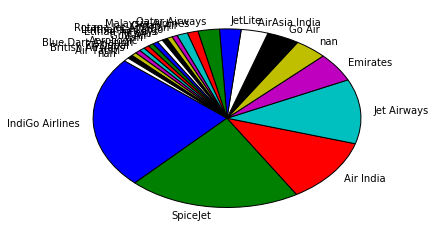

In [ ]:
#Plotting pie chart of market share
labels = airline_ICAO.Callsign
sizes = airline_ICAO.Count
plt.figure(2)
plt.pie(sizes, labels=labels,startangle=140)
plt.show()

In [ ]:
data

,hexcode,mode,squawk,flight,altitude,speed,heading,latitude,longitude,signal,messages,ti,timestamp
0,800b05,S,,,5850,,,,,23,1,0,2014-10-19 07:12:15
1,800b05,S,,,5850,211,217,,,23,2,0,2014-10-19 07:12:15.001000
2,800b05,S,,,5850,211,217,,,23,2,1,2014-10-19 07:12:16
3,8006fc,S,,,38350,,,,,6,1,0,2014-10-19 07:12:16.001000
4,800b05,S,,,5850,211,217,,,23,2,1,2014-10-19 07:12:16.002000
5,8006fc,S,,,38350,,,,,6,1,0,2014-10-19 07:12:16.003000
6,800b05,S,,,5850,211,217,,,23,3,0,2014-10-19 07:12:16.004000
7,8006fc,S,,,38375,,,,,6,3,0,2014-10-19 07:12:16.005000
8,800b05,S,,,5850,211,217,,,22,4,0,2014-10-19 07:12:16.006000
9,8006fc,S,,,38375,,,,,6,3,1,2014-10-19 07:12:17


In [ ]:
data['hexcode'][3]

'8006fc'

In [ ]:
unique_flight[2]

'AIC640'

In [ ]:
data_hexcode_flight = data[['hexcode','flight']]

In [ ]:
data_hexcode_flight

,hexcode,flight
0,800b05,
1,800b05,
2,800b05,
3,8006fc,
4,800b05,
5,8006fc,
6,800b05,
7,8006fc,
8,800b05,
9,8006fc,


In [ ]:
# Replace blank spaces which are six spaces. Hence, below are six spaces replaced by NaN

In [ ]:
data_hexcode_flight_blankremoved_replacedbyNaN = data_hexcode_flight.replace('      ',np.nan,regex=True)

In [ ]:
data_hexcode_flight_blankremoved_replacedbyNaN

,hexcode,flight
0,800b05,NaN
1,800b05,NaN
2,800b05,NaN
3,8006fc,NaN
4,800b05,NaN
5,8006fc,NaN
6,800b05,NaN
7,8006fc,NaN
8,800b05,NaN
9,8006fc,NaN


In [ ]:
# Drop duplicates, for example - 800af1-NaN is present more than once in rows 0, 3, 7 and so on. After the below
# step, only row 0 with 800af1 - NaN will be present

In [ ]:
data_hexcode_flight_noduplicates_NaN = data_hexcode_flight_blankremoved_replacedbyNaN.drop_duplicates(subset=['hexcode','flight'])

In [ ]:
data_hexcode_flight_noduplicates_NaN

,hexcode,flight
0,800b05,NaN
3,8006fc,NaN
19,8004fd,NaN
31,8004fb,NaN
47,8004b8,NaN
97,800b14,NaN
169,800549,NaN
350,800b05,BDA403
495,8004fd,AIC640
694,80015a,NaN


In [ ]:
type(data_hexcode_flight_noduplicates_NaN['hexcode'][0])

str

In [ ]:
unique_hexcode[0]

'800b05'

In [ ]:
len(unique_hexcode)

130

In [ ]:
len(data_hexcode_flight_noduplicates_NaN)

282

In [ ]:
data_hexcode_flight_noduplicates_NaN

,hexcode,flight
0,800b05,NaN
3,8006fc,NaN
19,8004fd,NaN
31,8004fb,NaN
47,8004b8,NaN
97,800b14,NaN
169,800549,NaN
350,800b05,BDA403
495,8004fd,AIC640
694,80015a,NaN


In [ ]:
data_hexcode_flight_noduplicates_NaN = data_hexcode_flight_noduplicates_NaN.reset_index(drop=True)

In [ ]:
data_hexcode_flight_noduplicates_NaN.flight = data_hexcode_flight_noduplicates_NaN.flight.str.strip() # remove unwanted blank spaces in string ex: 'ALK2671  ' to 'ALK2671''
data_hexcode_flight_noduplicates_NaN

,hexcode,flight
0,800b05,NaN
1,8006fc,NaN
2,8004fd,NaN
3,8004fb,NaN
4,8004b8,NaN
5,800b14,NaN
6,800549,NaN
7,800b05,BDA403
8,8004fd,AIC640
9,80015a,NaN


In [ ]:
hexcodevsflight = pd.DataFrame()
i = 0
for i in range(len(unique_hexcode)):
    
    vsflight = pd.Series()
    vsflight_withoutNaN = pd.Series() # a series to remove NaN in case of planes which have valid flight number.However, planes for which flight number was not decoded, NaN is retained 
    dictionary_flights = {}
    j=0
    
    for j in range(len(data_hexcode_flight_noduplicates_NaN)):
        if(unique_hexcode[i] == data_hexcode_flight_noduplicates_NaN['hexcode'][j]):
            vsflight = vsflight.append(pd.Series([data_hexcode_flight_noduplicates_NaN['flight'][j]]))
                     
    if(vsflight.size > 1):
        vsflight_withoutNaN = vsflight.dropna()
    else:
        vsflight_withoutNaN = vsflight
    
    vsflight_withoutNaN = vsflight_withoutNaN.tolist() # converting to list removes the unwanted index of 0 in every entry   
    dictionary_flights = {unique_hexcode[i] : vsflight_withoutNaN}        
    hexcodevsflight = hexcodevsflight.append([pd.Series([dictionary_flights])])

hexcodevsflight = hexcodevsflight.reset_index(drop=True)
hexcodevsflight.columns = ['planes']

print hexcodevsflight
#hexcodevsflight.to_csv('Planevsflight.csv')

                                                planes
0                             {u'800b05': [u'BDA403']}
1                                   {u'8006fc': [nan]}
2       {u'8004fd': [u'AIC640', u'AIC639', u'AIC265']}
3                                   {u'8004fb': [nan]}
4                             {u'8004b8': [u'SEJ442']}
5                  {u'800b14': [u'IGO427', u'IGO428']}
6                             {u'800549': [u'GOW283']}
7                                   {u'80015a': [nan]}
8                             {u'8001d9': [u'SEJ871']}
9                  {u'800afb': [u'JAI256', u'JAI255']}
10                            {u'800af0': [u'IGO516']}
11                 {u'8005dd': [u'IGO421', u'IGO356']}
12                            {u'4007f1': [u'BAW118']}
13                            {u'80070f': [u'SEJ291']}
14                 {u'80047b': [u'AIC515', u'AIC517']}
15                 {u'8007f7': [u'GOW321', u'GOW116']}
16                            {u'800603': [u'IGO545']}
17        

In [ ]:
hexcodevsflight.to_csv('planesvsflight.csv')